# Análisis Exploratorio de Datos (2)

## Exploración de relaciones

Desde un punto de vista conceptual:

* Variable Respuesta vs Variables explicativas
* Variables Explicativas vs Otras variables Explicativas
* Variable Respuesta vs Otras variables Respuesta

Desde un punto de vista práctico:

* Variable Cualitativa vs Variable Cualitativa
* Variable Continua vs Variable Cualitativa
* Variable Continua vs Variable Continua

Inicio de la sesión

In [1]:
#from pyspark import SparkContext
#sc = SparkContext()
#from pyspark.sql import SQLContext
#sqlContext=SQLContext(sc)

In [1]:
bd5 = sqlContext.read.format(
    "com.databricks.spark.csv"
).option("header", "true").load("bd5.csv", inferSchema=True)
sqlContext.registerDataFrameAsTable(bd5, "bd5")

## V. Continua vs V. Cualitativa


Tablas de Resumen Numérico

In [2]:
g3 = sqlContext.sql("select Dest, count(*) as n, \
               avg(ArrDelay) as Mean, \
               stddev(ArrDelay) as Std \
               from bd5 group by Dest")
g3.show()

+----+----+------------------+------------------+
|Dest|   n|              Mean|               Std|
+----+----+------------------+------------------+
| ORD|3734| 7.260846277450455|  63.0674251632543|
| LAS|3675|14.813877551020408| 46.31750232144356|
| LAX|5253| 22.35275080906149| 56.97652432880388|
| ATL|3081|3.1830574488802337| 44.70609198877387|
| DEN|3889|12.572897917202365| 50.46850865749093|
| PHX|3243|11.315757015109467| 43.22056776989165|
| DFW|3248| 6.710591133004926| 63.41186773315505|
| SFO|4343| 20.50448998388211|50.348151476304594|
+----+----+------------------+------------------+



Resumen Gráfico

In [3]:
pdf3=g3.toPandas()
pdf3

,Dest,n,Mean,Std
0,ORD,3734,7.260846,63.067425
1,LAS,3675,14.813878,46.317502
2,LAX,5253,22.352751,56.976524
3,ATL,3081,3.183057,44.706092
4,DEN,3889,12.572898,50.468509
5,PHX,3243,11.315757,43.220568
6,DFW,3248,6.710591,63.411868
7,SFO,4343,20.504490,50.348151


Representación gráfica de la información agregada

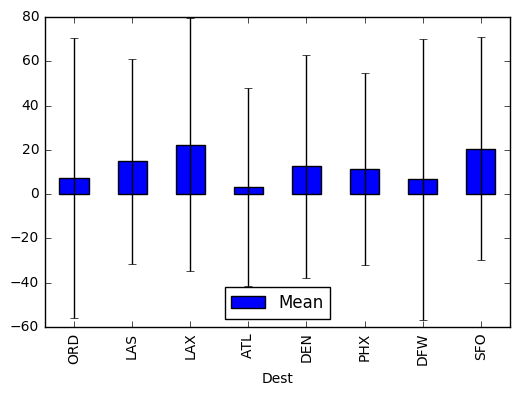

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pdf3.plot(kind='bar',x='Dest',y='Mean',yerr='Std')

Representación gráfica de una muestra de datos 

In [5]:
pdf4 = bd5.sample(False, 0.1, 0).select('Dest','Horario','ArrDelay','DepDelay','RetrasoNeto').toPandas()
pdf4[1:10]

,Dest,Horario,ArrDelay,DepDelay,RetrasoNeto
1,LAX,4,-20.0,9.0,-29.0
2,LAX,4,30.0,40.0,-10.0
3,LAX,4,-11.0,-5.0,-6.0
4,LAX,4,-4.0,10.0,-14.0
5,LAX,4,7.0,2.0,5.0
6,LAS,2,2.0,-1.0,3.0
7,LAS,2,1.0,4.0,-3.0
8,LAX,4,1.0,22.0,-21.0
9,LAX,4,74.0,90.0,-16.0


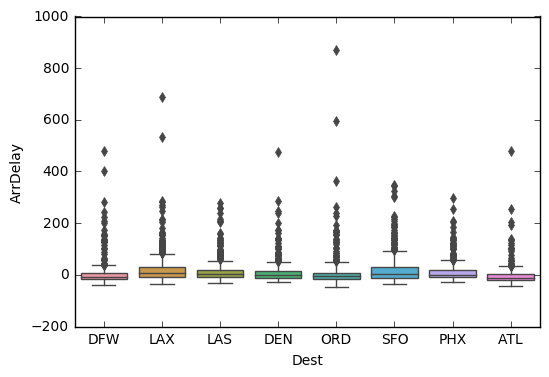

In [6]:
import seaborn as sns
sns.boxplot(x='Dest',y='ArrDelay',data=pdf4)

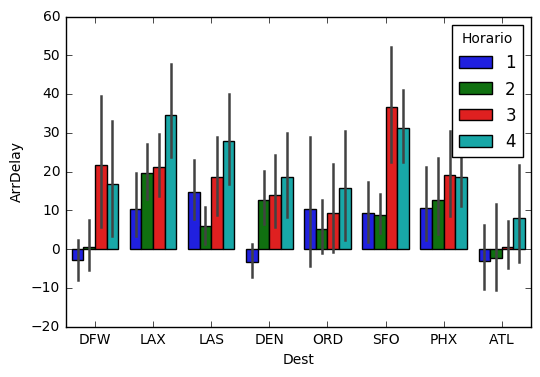

In [7]:
sns.barplot(x="Dest", y="ArrDelay", hue="Horario", data=pdf4)

## V. Cualitativa vs V. Cualitativa

Resumen Numérico

In [8]:
pdf6 = sqlContext.sql("select Dest, Retraso, count(*) as n \
               from bd5 group by Dest, Retraso \
               order by Dest, Retraso").toPandas()
pdf6

,Dest,Retraso,n
0,ATL,0,2527
1,ATL,1,554
2,DEN,0,2885
3,DEN,1,1004
4,DFW,0,2647
5,DFW,1,601
6,LAS,0,2620
7,LAS,1,1055
8,LAX,0,3229
9,LAX,1,2024


Resumen Gráfico

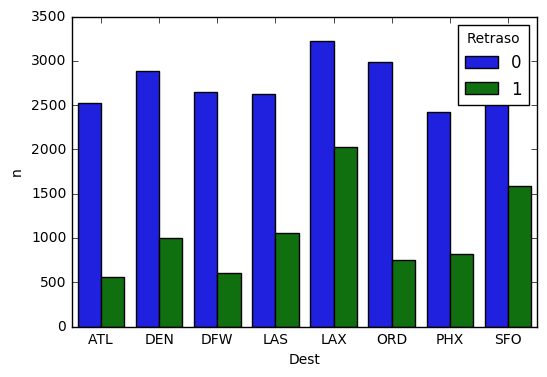

In [9]:
sns.barplot(x="Dest", y="n", hue="Retraso", data=pdf6)

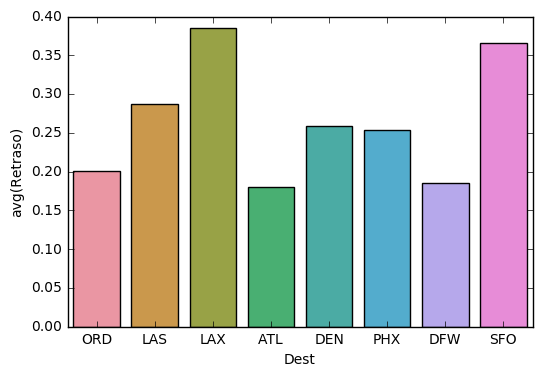

In [10]:
pdf7 = bd5.groupBy('Dest').mean('Retraso').toPandas()
sns.barplot(x="Dest", y="  avg(Retraso)", data=pdf7)

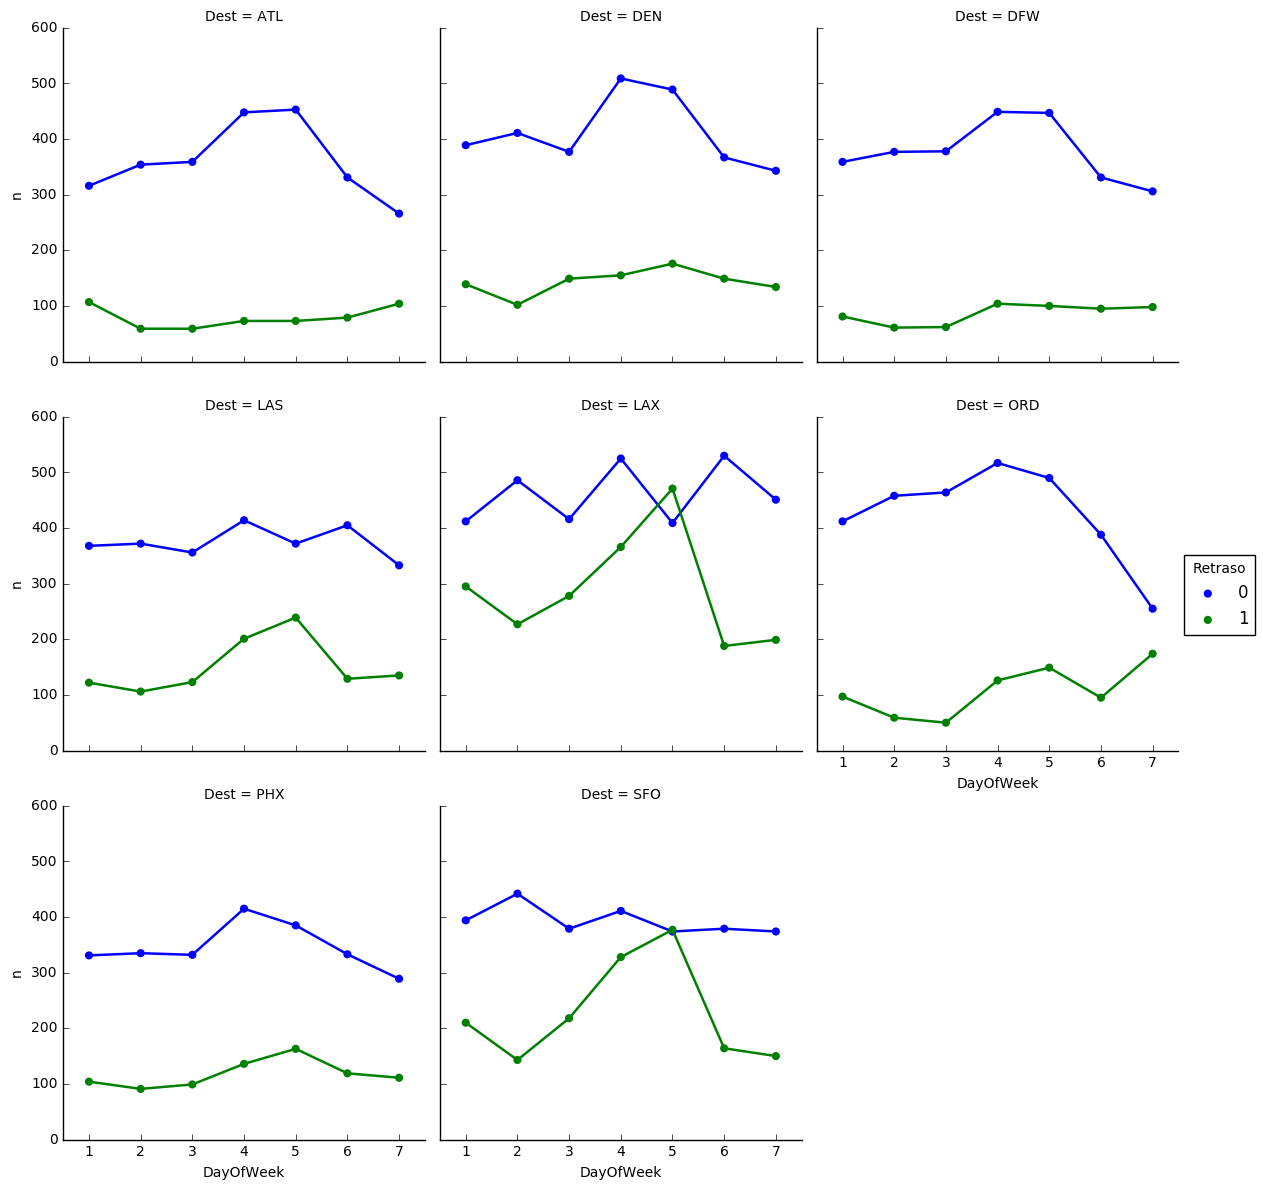

In [11]:
pdf8 = sqlContext.sql("select DayOfWeek, Dest, Retraso, count(*) as n \
               from bd5 group by DayOfWeek, Dest, Retraso \
               order by DayOfWeek, Dest, Retraso").toPandas()

sns.factorplot(x="DayOfWeek", y="n", col="Dest", hue="Retraso", data=pdf8, col_wrap=3,)

## V. Continua vs V. Continua

Resumen Numérico

In [12]:
bd5.corr('ArrDelay','DepDelay')

0.9571345646224725

In [13]:
bd5.corr('RetrasoNeto','DepDelay')

0.08921162142633973

Resumen correlaciones a partir de una muestra

In [14]:
pdf4.corr()

,Horario,ArrDelay,DepDelay,RetrasoNeto
Horario,1.000000,0.135776,0.120853,0.081756
ArrDelay,0.135776,1.000000,0.959762,0.371824
DepDelay,0.120853,0.959762,1.000000,0.096182
RetrasoNeto,0.081756,0.371824,0.096182,1.000000


Resumen Gráfico

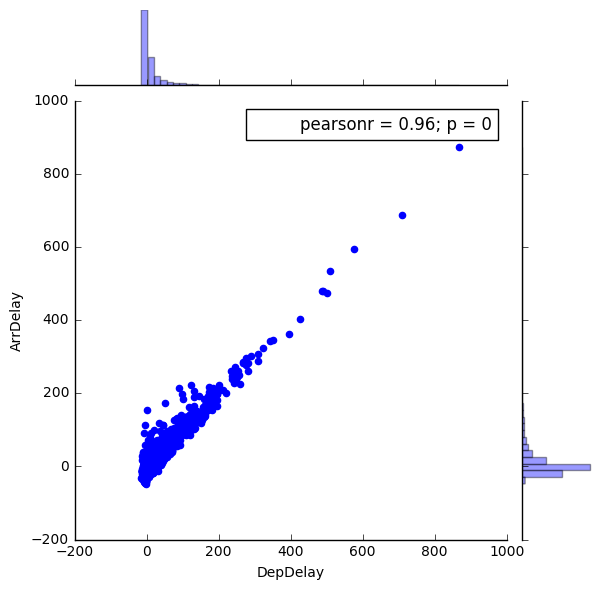

In [15]:
sns.jointplot(x="DepDelay", y="ArrDelay", data=pdf4)

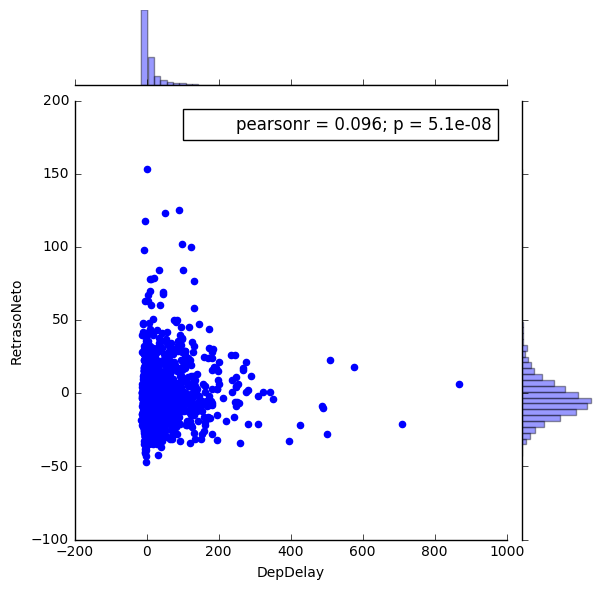

In [16]:
sns.jointplot(x="DepDelay", y="RetrasoNeto", data=pdf4)